In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyalluvial.alluvial as alluvial
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Datos Alluvial

In [2]:
dicc = {'positive regulation of cellular metabolic process': 'Regulación positiva de procesos metabolicos', 
        'positive regulation of metabolic process': 'Regulación positiva de procesos metabolicos', 
        'positive regulation of cell population proliferation': 'Regulación positiva de proliferación celular',
       'cell population proliferation': 'Regulación positiva de proliferación celular',
        'protein phosphorylation': 'Fosforilación de proteinas',
        'regulation of cell population proliferation':'Regulación positiva de proliferación celular',
        'tube development':'Desarrollo de tubo',
        'tube morphogenesis': 'Morfogénesis de tubo',
        'Phosphate−containing compound metabolic process': 'Fosforilación de proteinas',
        'epithelial cell proliferation': 'Proliferación de células epiteliales', 
        'phosphorylation': 'Fosforilación',
        'positive regulation of protein metabolic process': 'Regulación positiva del metabolismo de proteínas',
        'Regulation of nitrogen compound metabolic process':'Regulación del proceso metabólico de compuestos de nitrógeno',
        'Negative regulation of cellular metabolic process':'Regulación negativa del proceso metabólico celular',
        'positive regulation of gene expression': 'Regulación positiva de la expresión genética',
        'cellular macromolecule biosynthetic process': 'Proceso biosintético de macromoléculas celulares',
        'regulation of epithelial cell proliferation': 'Proliferación de células epiteliales', 
        'regulation of protein serine/threonine kinase activity': 'Regulación de la proteína serina/treonina quinasa',
        'phosphate-containing compound metabolic process': 'Metabolismo de fosfato',
        'regulation of nitrogen compound metabolic process': 'Metabolismo de nitrógeno',
        'negative regulation of cellular metabolic process': 'Regulación negativa del metabolismo celular',
        'positive regulation of protein phosphorylation': 'Fosforilación de proteinas',
        'tissue development': 'Desarrollo de tejidos',
        'anatomical structure morphogenesis': 'Morfogénesis',
        'regulation of metabolic process':'Regulación del proceso metabólico',
        'muscle structure development': 'Desarrollo de estructura muscular',
        'cellular response to organic substance': 'Respuesta celular a sustancia orgánica',
        'regulation of cell differentiation': 'Regulación de diferenciación celular',
        'response to organonitrogen compound': 'Respuesta al compuesto organonitrogenado',
        'cell surface receptor signaling pathway': 'Señalización del receptor de superficie celular',
        'cell differentiation': 'Regulación de diferenciación celular', 
        'response to nitrogen compound': 'Respuesta al compuesto de nitrógeno',
         'negative regulation of intracellular signal transduction': 'Regulación negativa de transducción de señales intracelulares',
    'positive regulation of protein kinase activity':'Regulación positiva de actividad de quinasa',
    'positive regulation of protein serine/threonine kinase activity':'Regulación positiva de la actividad de serina/treonina quinasa',
    'positive regulation of phosphorylation':'Regulación positiva de fosforilación',
    'response to cytokine': 'Respuesta a citocina',
    'positive regulation of peptidyl-serine phosphorylation':'Regulación positiva de la fosforilación de peptidil-serina',
'protein autophosphorylation':'Fosforilación de proteinas',
'regulation of MAPK cascade':'Regulación positiva de la cascada MAPK',
        'regulation of MAP kinase activity':'Regulación positiva de actividad de la quinasa MAP',
         'positive regulation of MAPK cascade':'Regulación positiva de la cascada MAPK',
        'positive regulation of MAP kinase activity': 'Regulación positiva de actividad de la quinasa MAP',
        'regulation of cellular component movement':'Regulación del movimiento de los componentes celulares',
        'regulation of cell motility': 'Regulación de motilidad celular', 
        'positive regulation of kinase activity': 'Regulación positiva de la actividad quinasa',
        'regulation of JNK cascade': 'Regulación de cascada JNK', 
        'interleukin-1-mediated signaling pathway': 'Vía de señalización mediada por interleucina-1',
        'C-5 methylation of cytosine':'Metilación de DNA',
        'DNA methylation': 'Metilación de DNA',
        'regulation of gene expression, epigenetic':'Regulación epigenética',
        'negative regulation of gene expression, epigenetic':'Regulación epigenética',
'DNA methylation on cytosine':'Metilación de DNA',
 'DNA modification':'Modificación de DNA',
 'negative regulation of transcription, DNA-templated':'Regulación negativa de transcripción',
        'positive regulation of epithelial cell proliferation':'Proliferación de células epiteliales', 
'oxidation-reduction process': 'Proceso de oxidación-reducción',
'positive regulation of intracellular signal transduction':'Regulación positiva de la transducción de señales intracelulares',
'protein-containing complex assembly':'Ensamble de complejos que contienen proteínas',
        'protein tetramerization':'Tetramerización de proteínas', 
        'negative regulation of protein metabolic process':'Regulación negativa del proceso metabólico de las proteínas',
'negative regulation of programmed cell death':'Regulación negativa de la muerte celular programada',
        'regulation of locomotion':'Regulación de la locomoción', 
         'response to ionizing radiation':'Respuesta a la radiación ionizante',
 'response to alkaloid':'Respuesta a los alcaloides',
 'cellular respiration':'Respiración celular',
 'aerobic respiration':'Respiración celular',
        'negative regulation of nucleic acid-templated transcription':'Regulación negativa de transcripción',
 'response to vitamin A':'Respesta a vitamina A',
        'negative regulation of cell differentiation':'Regulación negativa de diferenciación celular',
'negative regulation of gene expression':'Regulación negativa de la expresión génica',
'regulation of cell death':'Regulación de muerte celular',
'multicellular organism development':'Desarrollo de organismos multicelulares',
'system development': 'Desarrollo de sistema',
'cell death':'Regulación de muerte celular',
'negative regulation of growth': 'Regulación negativa del crecimiento',
'response to hypoxia': 'Respuesta a hipoxia',
'response to hormone': 'Respuesta a la hormona',
'transcription by RNA polymerase II': 'Transcripción por la RNA polimerasa II',
'response to organic substance': 'Respuesta a la sustancia orgánica',
        'programmed cell death':'Regulación de muerte celular',
        'regulation of growth':'Regulación de crecimiento',
        'gland development': 'Desarrollo glandular',
'mesenchyme development': 'Desarrollo mesenquimal',
'positive regulation of transcription, DNA-templated': 'regulación positiva de transcripción',
'respose to growth factor': 'respuesta del factor de crecimiento',
        'neurogenesis': 'Generación de neuronas',
        'generation of neurons':'Generación de neuronas',
        'negative regulation of transcription by RNA polymerase II': 'Regulación negativa de transcripción por RNA polimerasa II',
        'regulation of gene expression': 'Regulación de expresión génica',
'regulation of protein phosphorylation': 'Fosforilación de proteinas',
'response to growth factor': 'Respuesta al factor de crecimiento',
        'regulation of neurogenesis': 'Generación de neuronas'
       }

In [3]:
dft = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_time_Filter.tsv', sep = '\t')
dft.replace(dicc, inplace =  True)

dft_pathways_count = pd.DataFrame(dft[['function', 'Variant']].value_counts()).reset_index()
df_top10t = dft_pathways_count.groupby(['Variant']).head(15)

df_top10t.columns = ['Via', 'tiempo', 'conteo']


to_replace = {'(2021-01-01,2021-05-01]':1, '(2022-06-01,2022-11-01]':2,
       '(2022-01-01,2022-06-01]':3, '(2021-05-01,2022-01-01]':4,
       '(2023-01-01,2023-07-01]':5, '(2020-09-01,2021-01-01]':6,
       '(2023-07-01,2023-09-06]':7, '(2022-11-01,2023-01-01]':8,
       '(2010-12-05,2020-03-01]':9, '(2020-03-01,2020-09-01]':10}


df_top10t

,Via,tiempo,conteo
0,Regulación positiva de proliferación celular,"(2022-06-01,2022-11-01]",85
1,Regulación positiva de proliferación celular,"(2021-05-01,2022-01-01]",85
2,Regulación positiva de proliferación celular,"(2021-01-01,2021-05-01]",83
3,Regulación positiva de proliferación celular,"(2023-01-01,2023-07-01]",83
4,Regulación positiva de proliferación celular,"(2020-09-01,2021-01-01]",80
...,...,...,...
236,Regulación positiva de la cascada MAPK,"(2020-03-01,2020-09-01]",19
250,Desarrollo de tubo,"(2020-03-01,2020-09-01]",19
259,Regulación de expresión génica,"(2023-07-01,2023-09-06]",19
267,Fosforilación,"(2023-07-01,2023-09-06]",19


In [4]:
df_top10t['RF'] = df_top10t['conteo'] / df_top10t.groupby('tiempo')['conteo'].transform('sum')
df_top10t.to_csv('../../Data/Alluvial.tsv', sep = '\t', index = False)
df_top10t

/tmp/ipykernel_21610/3192284896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10t['RF'] = df_top10t['conteo'] / df_top10t.groupby('tiempo')['conteo'].transform('sum')


,Via,tiempo,conteo,RF
0,Regulación positiva de proliferación celular,"(2022-06-01,2022-11-01]",85,0.138211
1,Regulación positiva de proliferación celular,"(2021-05-01,2022-01-01]",85,0.135783
2,Regulación positiva de proliferación celular,"(2021-01-01,2021-05-01]",83,0.130709
3,Regulación positiva de proliferación celular,"(2023-01-01,2023-07-01]",83,0.140678
4,Regulación positiva de proliferación celular,"(2020-09-01,2021-01-01]",80,0.130719
...,...,...,...,...
236,Regulación positiva de la cascada MAPK,"(2020-03-01,2020-09-01]",19,0.037475
250,Desarrollo de tubo,"(2020-03-01,2020-09-01]",19,0.037475
259,Regulación de expresión génica,"(2023-07-01,2023-09-06]",19,0.034111
267,Fosforilación,"(2023-07-01,2023-09-06]",19,0.034111


# Otros

In [5]:
dfv = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_SinEstructuras_variant_Filter.tsv', sep = '\t')
dfs = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectral_Filter.tsv', sep = '\t')
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter.tsv', sep = '\t')
dfgt = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter.tsv', sep = '\t')
dfv

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR,Expression,...,lung,esophagus,kidney,artery,heart,vein,pancreas,stomach,liver,0
0,cellular response to parathyroid hormone stimulus,0.008178,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
1,negative regulation of DNA-binding transcripti...,0.008178,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
2,negative regulation of ossification,0.013669,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
3,negative regulation of osteoblast differentiation,0.008178,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
4,osteoblast differentiation,0.021794,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31","{'kidney': 47.3691337301885, 'brain': 282.3801...",...,12.382684,26.206047,47.369134,6.166493,28.999434,17.336111,26.912480,128.365923,36.05762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366168,vascular endothelial growth factor signaling p...,0.006034,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN
366169,vasculature development,0.004227,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN
366170,vasculogenesis,0.019576,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN
366171,wound healing,0.009199,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12","{'kidney': 13264.606798709408, 'brain': 191.82...",...,5440.077182,11569.106880,13264.606799,13520.519870,16381.427129,7599.012124,7527.710558,15835.569036,13632.12653,NaN


In [6]:
dft['function'] = dft['function'].replace(dicc)
dfv['function'] = dfv['function'].replace(dicc)
dfs['function'] = dfs['function'].replace(dicc)
dfsp['function'] = dfsp['function'].replace(dicc)
dfgt['function'] = dfgt['function'].replace(dicc)

# Inspección global

In [7]:
list_df = [dft, dfv, dfs, dfsp, dfgt]
df_db = pd.DataFrame()
df_db2 = pd.DataFrame()

for i in list_df:
    df_name = [name for name in globals() if globals()[name] is i]
    ii = i[i['Variant']!='Global']

    print(f'''
        Nombre: {df_name}
        vias unicas desreguladas: {len(ii['function'].unique())}
        Promedio por variante: {ii[['function','Variant']].value_counts().reset_index()['Variant'].value_counts().agg(['mean', 'std'])}

        Promedio por region: {ii[['Variant', 'function', 'Region']].groupby(['Variant', 'Region']).value_counts().reset_index()[['Variant', 'Region']].value_counts().reset_index().drop(['Variant'], axis = 1).groupby('Region').agg(['mean', 'std'])}
        Vias con mas miRNA: {ii[['function', 'Variant']].value_counts().reset_index().drop(['Variant'], axis = 1).groupby('function').agg(['mean', 'std']).reset_index().sort_values(by=('count', 'mean'), ascending=False).head(4)}
    ''')

    df_i = ii[['Variant', 'function', 'Region']].groupby(['Variant', 'Region']).value_counts().reset_index()[['Variant', 'Region']].value_counts().reset_index()
    df_i['Table'] = str(df_name)

    df_i2 = ii[['Variant', 'function', 'Region']].groupby(['Variant', 'Region']).value_counts().reset_index()
    df_i2['Table'] = str(df_name)

    df_db = pd.concat([df_db, df_i])
    df_db2 = pd.concat([df_db2, df_i2])


        Nombre: ['dft', 'i']
        vias unicas desreguladas: 3361
        Promedio por variante: mean    2549.700000
std       94.207867
Name: count, dtype: float64

        Promedio por region:          count            
          mean         std
Region                    
3'UTR   1565.5  305.286114
5'UTR   2142.3  179.418226
        Vias con mas miRNA:                                          function count          
                                                   mean       std
136  Regulación positiva de proliferación celular  78.9  5.566766
135   Regulación positiva de procesos metabolicos  57.4  4.903513
57                     Fosforilación de proteinas  56.9  5.606544
64                         Generación de neuronas  51.5  5.190804
    

        Nombre: ['_', 'dfv', '_5', 'i']
        vias unicas desreguladas: 3475
        Promedio por variante: mean    2529.526316
std      195.603396
Name: count, dtype: float64

        Promedio por region:               count          

In [8]:
df_db

,Variant,Region,count,Table
0,"(2021-01-01,2021-05-01]",5'UTR,2404,"['dft', 'i']"
1,"(2020-09-01,2021-01-01]",5'UTR,2401,"['dft', 'i']"
2,"(2022-06-01,2022-11-01]",5'UTR,2228,"['dft', 'i']"
3,"(2021-05-01,2022-01-01]",5'UTR,2214,"['dft', 'i']"
4,"(2023-01-01,2023-07-01]",5'UTR,2200,"['dft', 'i']"
...,...,...,...,...
7,Gs2,3'UTR,1215,"['dfsp', 'i']"
0,Gst2,5'UTR,2662,"['dfgt', 'i']"
1,Gst1,5'UTR,2081,"['dfgt', 'i']"
2,Gst2,3'UTR,1963,"['dfgt', 'i']"


In [9]:
df_db = df_db[df_db['Table']!=str(['dfs', 'i'])]
DF5 = df_db[df_db['Region']=="5'UTR"]
DF3 = df_db[df_db['Region']=="3'UTR"]

In [10]:
counts = DF5['count']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(counts)
print(f'Estadístico: {stat}, p-valor: {p_value}')


model = ols('count ~ C(Table)', data=DF5).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model)
print(anova_table)

Estadístico: 0.9766117930412292, p-valor: 0.36905437707901
            df        sum_sq       mean_sq         F    PR(>F)
C(Table)   3.0  1.922355e+05  64078.494607  0.837613  0.479653
Residual  50.0  3.825064e+06  76501.288842       NaN       NaN


In [11]:
counts = DF3['count']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(counts)
print(f'Estadístico: {stat}, p-valor: {p_value}')


model = ols('count ~ C(Table)', data=DF3).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model)
print(anova_table)

Estadístico: 0.9662742614746094, p-valor: 0.13167648017406464
            df        sum_sq       mean_sq         F    PR(>F)
C(Table)   3.0  2.040092e+05  68003.063515  1.104999  0.355883
Residual  50.0  3.077064e+06  61541.280263       NaN       NaN


In [13]:
df_db2['Table'].value_counts()

Table
['_', 'dfv', '_5', 'i']    143851
['dft', 'i']                37078
['dfs', 'i']                21561
['dfsp', 'i']               15791
['dfgt', 'i']                8189
Name: count, dtype: int64

In [134]:
df_db2.to_csv('../../Data/miRNA_Pathways_statistical_difference.tsv', sep = '\t', index=False)
df_db2

,Variant,Region,function,count,Table
0,"(2010-12-05,2020-03-01]",3'UTR,Regulación positiva de proliferación celular,30,"['dft', 'i']"
1,"(2010-12-05,2020-03-01]",3'UTR,Regulación de muerte celular,25,"['dft', 'i']"
2,"(2010-12-05,2020-03-01]",3'UTR,Fosforilación de proteinas,24,"['dft', 'i']"
3,"(2010-12-05,2020-03-01]",3'UTR,Generación de neuronas,23,"['dft', 'i']"
4,"(2010-12-05,2020-03-01]",3'UTR,Proliferación de células epiteliales,22,"['dft', 'i']"
...,...,...,...,...,...
8184,Gst2,5'UTR,ventricular septum morphogenesis,1,"['dfgt', 'i']"
8185,Gst2,5'UTR,vesicle organization,1,"['dfgt', 'i']"
8186,Gst2,5'UTR,viral process,1,"['dfgt', 'i']"
8187,Gst2,5'UTR,visual behavior,1,"['dfgt', 'i']"


# Outliers Variants

In [152]:
df = df_db2[df_db2['Table']==str(['_', 'dfv', '_5', 'i'])].pivot(index= ['Variant', 'Region'], columns=['function'], values=['count'])
df

count                           \
function           ADP metabolic process ATP biosynthetic process   
Variant     Region                                                  
19A         3'UTR                    NaN                      1.0   
            5'UTR                    1.0                      NaN   
19B         3'UTR                    NaN                      1.0   
            5'UTR                    1.0                      NaN   
20A         3'UTR                    NaN                      1.0   
...                                  ...                      ...   
23E         5'UTR                    1.0                      NaN   
23F         3'UTR                    1.0                      1.0   
            5'UTR                    1.0                      NaN   
recombinant 3'UTR                    1.0                      1.0   
            5'UTR                    2.0                      NaN   

                                                                  \
function           ATP generation from ADP ATP metabolic process   
Variant     Region                                                 
19A         3'UTR                      NaN                   1.0   
            5'UTR                      1.0                   1.0   
19B         3'UTR                      NaN                   1.0   
            5'UTR                      1.0                   1.0   
20A         3'UTR                      NaN                   1.0   
...                                    ...                   ...   
23E         5'UTR                      1.0                   2.0   
23F         3'UTR                      1.0                   2.0   
            5'UTR                      1.0                   2.0   
recombinant 3'UTR                      1.0                   2.0   
            5'UTR                      2.0                   2.0   

                                                               \
function           B cell activation B cell apoptotic process   
Variant     Region                                              
19A         3'UTR                1.0                      2.0   
            5'UTR                NaN                      NaN   
19B         3'UTR                2.0                      2.0   
            5'UTR                NaN                      NaN   
20A         3'UTR                NaN                      NaN   
...                              ...                      ...   
23E         5'UTR                2.0                      1.0   
23F         3'UTR                1.0                      NaN   
            5'UTR                NaN                      NaN   
recombinant 3'UTR                1.0                      NaN   
            5'UTR                1.0                      1.0   

                                                              \
function           B cell differentiation B cell homeostasis   
Variant     Region                                             
19A         3'UTR                     1.0                1.0   
            5'UTR                     NaN                NaN   
19B         3'UTR                     2.0                1.0   
            5'UTR                     NaN                NaN   
20A         3'UTR                     NaN                NaN   
...                                   ...                ...   
23E         5'UTR                     2.0                NaN   
23F         3'UTR                     1.0                NaN   
            5'UTR                     NaN                NaN   
recombinant 3'UTR                     1.0                NaN   
            5'UTR                     1.0                NaN   

                                                                       ...  \
function           B cell lineage commitment B cell mediated immunity  ...   
Variant     Region                                                     ...   
19A         3'UTR                        NaN                      NaN  ..

In [153]:
df_standardized = (df - df.mean()) / df.std()

In [134]:
# Cálculo de cuartiles y IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df[(df < BI) | (df > BS)]
outliers.reset_index(inplace=True)
outliers

Variant Region                 count                           \
function                     ADP metabolic process ATP biosynthetic process   
0                 19A  3'UTR                   NaN                      NaN   
1                 19A  5'UTR                   NaN                      NaN   
2                 19B  3'UTR                   NaN                      NaN   
3                 19B  5'UTR                   NaN                      NaN   
4                 20A  3'UTR                   NaN                      NaN   
..                ...    ...                   ...                      ...   
71                23E  5'UTR                   NaN                      NaN   
72                23F  3'UTR                   NaN                      NaN   
73                23F  5'UTR                   NaN                      NaN   
74        recombinant  3'UTR                   NaN                      NaN   
75        recombinant  5'UTR                   NaN                      NaN   

                                                                          \
function ATP generation from ADP ATP metabolic process B cell activation   
0                            NaN                   NaN               NaN   
1                            NaN                   NaN               NaN   
2                            NaN                   NaN               2.0   
3                            NaN                   NaN               NaN   
4                            NaN                   NaN               NaN   
..                           ...                   ...               ...   
71                           NaN                   NaN               2.0   
72                           NaN                   NaN               NaN   
73                           NaN                   NaN               NaN   
74                           NaN                   NaN               NaN   
75                           NaN                   NaN               NaN   

                                                                             \
function B cell apoptotic process B cell differentiation B cell homeostasis   
0                             NaN                    NaN                NaN   
1                             NaN                    NaN                NaN   
2                             NaN                    2.0                NaN   
3                             NaN                    NaN                NaN   
4                             NaN                    NaN                NaN   
..                            ...                    ...                ...   
71                            NaN                    2.0                NaN   
72                            NaN                    NaN                NaN   
73                            NaN                    NaN                NaN   
74                            NaN                    NaN                NaN   
75                            NaN                    NaN                NaN   

          ...                                                         \
function  ... viral genome replication viral process visual behavior   
0         ...                      NaN           NaN             NaN   
1         ...                      NaN           NaN             NaN   
2         ...                      NaN           2.0             NaN   
3         ...                      NaN           NaN             NaN   
4         ...                      NaN           NaN             NaN   
..        ...                      ...           ...             ...   
71        ...                      NaN           NaN             NaN   
72        ...                      NaN           NaN             NaN   
73        ...                      NaN           NaN             NaN   
74        ...                      NaN           NaN             NaN   
75        ...                      NaN           NaN             NaN   

                                

In [135]:
outliers.columns = outliers.columns.droplevel()
outliers.columns = ['variant', 'region'] + list(outliers.columns[2:len(outliers.columns)])
outliers


,variant,region,ADP metabolic process,ATP biosynthetic process,ATP generation from ADP,ATP metabolic process,B cell activation,B cell apoptotic process,B cell differentiation,B cell homeostasis,...,viral genome replication,viral process,visual behavior,visual learning,visual system development,water homeostasis,white fat cell differentiation,wound healing,"wound healing, spreading of cells","wound healing, spreading of epidermal cells"
0,19A,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,19A,5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19B,3'UTR,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19B,5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20A,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23E,5'UTR,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,23F,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
73,23F,5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,recombinant,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [136]:
df_melt = pd.melt(outliers, id_vars=['variant', 'region'], value_vars=outliers.columns[2:len(outliers.columns)])
df_melt

,variant,region,variable,value
0,19A,3'UTR,ADP metabolic process,NaN
1,19A,5'UTR,ADP metabolic process,NaN
2,19B,3'UTR,ADP metabolic process,NaN
3,19B,5'UTR,ADP metabolic process,NaN
4,20A,3'UTR,ADP metabolic process,NaN
...,...,...,...,...
264095,23E,5'UTR,"wound healing, spreading of epidermal cells",NaN
264096,23F,3'UTR,"wound healing, spreading of epidermal cells",NaN
264097,23F,5'UTR,"wound healing, spreading of epidermal cells",NaN
264098,recombinant,3'UTR,"wound healing, spreading of epidermal cells",NaN


<Axes: xlabel='value', ylabel='Count'>

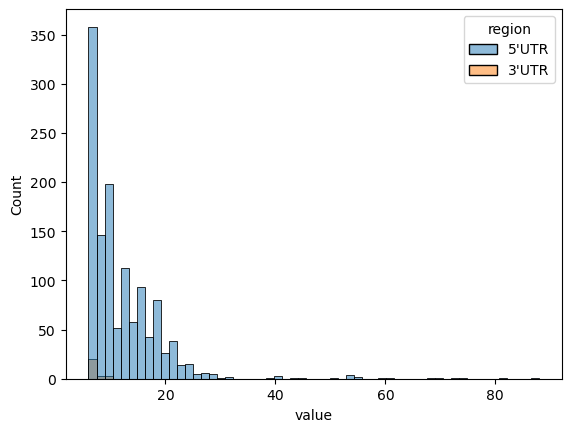

In [16]:
sns.histplot(data=df_melt[df_melt['value']>5], x = 'value', hue='region')

<Axes: xlabel='value', ylabel='Count'>

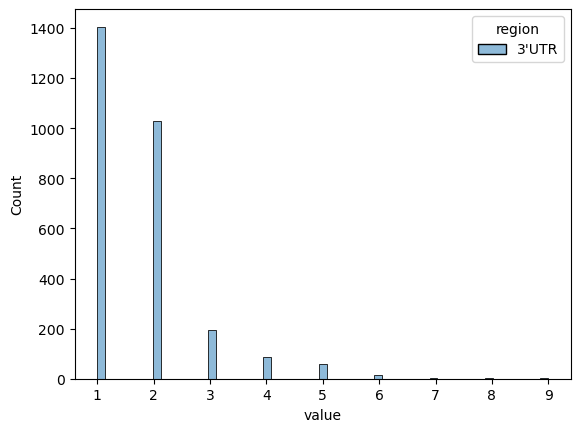

In [17]:
sns.histplot(data=df_melt[df_melt['region']=="3'UTR"], x = 'value', hue='region')

In [137]:
dff5 = df_melt[df_melt['value']>20].pivot(index = ['variant', 'region'], columns=['variable'], values=['value']).reset_index()

dff5.columns = dff5.columns.droplevel()
dff5.columns = ['variant', 'region'] + list(dff5.columns[2:len(dff5.columns)])
dff5


,variant,region,Desarrollo de organismos multicelulares,Desarrollo de sistema,Desarrollo de tubo,Desarrollo glandular,Fosforilación,Fosforilación de proteinas,Generación de neuronas,Metabolismo de nitrógeno,...,regulation of cell cycle,regulation of cellular protein metabolic process,regulation of nucleic acid-templated transcription,regulation of phosphorus metabolic process,regulation of phosphorylation,regulation of protein metabolic process,regulation of transcription by RNA polymerase II,"regulation of transcription, DNA-templated","transcription, DNA-templated",vasculature development
0,20B,5'UTR,NaN,21.0,NaN,NaN,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20D,5'UTR,21.0,24.0,24.0,22.0,28.0,73.0,54.0,31.0,...,21.0,24.0,21.0,21.0,23.0,23.0,22.0,22.0,23.0,NaN
2,21H,5'UTR,21.0,23.0,24.0,NaN,25.0,NaN,NaN,27.0,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
3,21I,5'UTR,23.0,27.0,27.0,24.0,29.0,74.0,55.0,31.0,...,NaN,24.0,NaN,21.0,23.0,23.0,NaN,NaN,22.0,23.0
4,22B,5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22E,5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22F,5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23C,5'UTR,NaN,NaN,NaN,NaN,25.0,NaN,NaN,27.0,...,NaN,22.0,NaN,NaN,22.0,22.0,NaN,NaN,NaN,NaN


In [138]:
dff3 = df_melt[(df_melt['value']>= 5)&(df_melt['region']=="3'UTR")].pivot(index = ['variant', 'region'], columns=['variable'], values=['value']).reset_index()

dff3.columns = dff3.columns.droplevel()
dff3.columns = ['variant', 'region'] + list(dff3.columns[2:len(dff3.columns)])
dff3

,variant,region,Modificación de DNA,Respuesta a citocina,Wnt signaling pathway,anoikis,cell projection organization,cell-cell signaling by wnt,cellular response to extracellular stimulus,cellular response to nutrient levels,...,regulation of focal adhesion assembly,regulation of glucose metabolic process,regulation of lipid catabolic process,regulation of protein kinase B signaling,regulation of protein stability,response to amino acid,response to retinoic acid,response to starvation,steroid metabolic process,striated muscle cell development
0,20A,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20B,3'UTR,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20C,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20D,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20E,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
5,20G,3'UTR,NaN,5.0,NaN,NaN,NaN,NaN,9.0,8.0,...,NaN,5.0,NaN,6.0,NaN,8.0,5.0,5.0,5.0,NaN
6,21C,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21D,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21E,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21F,3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
dff3.drop(['region'], axis=1, inplace=True); dff5.drop(['region'], axis=1, inplace=True)

dff5.set_index('variant').T.to_csv('../../Data/MatrixOutliersVariants_5.tsv', sep='\t')
dff3.set_index('variant').T.to_csv('../../Data/MatrixOutliersVariants_3.tsv', sep='\t')

In [154]:
df_standardized = df_standardized.reset_index()
df_standardized.columns = df_standardized.columns.droplevel()
df_standardized.columns = ['variant', 'region'] + list(df_standardized.columns[2:len(df_standardized.columns)])
df_standardized.fillna(0, inplace=True)

df_standardized

,variant,region,ADP metabolic process,ATP biosynthetic process,ATP generation from ADP,ATP metabolic process,B cell activation,B cell apoptotic process,B cell differentiation,B cell homeostasis,...,viral genome replication,viral process,visual behavior,visual learning,visual system development,water homeostasis,white fat cell differentiation,wound healing,"wound healing, spreading of cells","wound healing, spreading of epidermal cells"
0,19A,3'UTR,0.000000,-0.441858,0.000000,-0.861870,-0.476474,0.212566,-0.476474,-0.596479,...,1.082925,-0.385640,0.000000,-0.828734,-0.066380,0.0,-0.308957,-0.614292,-1.328651,0.0
1,19A,5'UTR,-0.667797,0.000000,-0.667797,-0.861870,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.828734,-1.075359,0.0,0.000000,-0.614292,0.183967,0.0
2,19B,3'UTR,0.000000,-0.441858,0.000000,-0.861870,2.042029,0.212566,2.042029,-0.596479,...,1.082925,2.506658,0.000000,-0.828734,-0.570870,0.0,-0.308957,-1.379640,0.000000,0.0
3,19B,5'UTR,-0.667797,0.000000,-0.667797,-0.861870,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.828734,-1.075359,0.0,0.000000,-0.614292,0.183967,0.0
4,20A,3'UTR,0.000000,-0.441858,0.000000,-0.861870,0.000000,0.000000,0.000000,0.000000,...,-0.902438,-0.385640,0.000000,0.000000,0.942599,0.0,3.089572,0.151055,0.183967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23E,5'UTR,-0.667797,0.000000,-0.667797,0.204512,2.042029,-1.032462,2.042029,0.000000,...,0.000000,0.000000,-0.383136,1.803714,-0.066380,0.0,0.000000,-0.614292,0.183967,0.0
72,23F,3'UTR,-0.667797,-0.441858,-0.667797,0.204512,-0.476474,0.000000,-0.476474,0.000000,...,-0.902438,-0.385640,0.000000,0.000000,-0.066380,0.0,-0.308957,0.916403,1.696585,0.0
73,23F,5'UTR,-0.667797,0.000000,-0.667797,0.204512,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.383136,0.926232,-0.570870,0.0,0.000000,-0.614292,0.183967,0.0
74,recombinant,3'UTR,-0.667797,-0.441858,-0.667797,0.204512,-0.476474,0.000000,-0.476474,0.000000,...,-0.902438,0.000000,0.000000,0.000000,-0.570870,0.0,0.000000,-0.614292,-1.328651,0.0


In [155]:


# Separar las características y la etiqueta
df = df_standardized
X = df.drop(['variant', 'region'], axis=1)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas de variante y región
pca_df['variante'] = df['variant']
pca_df['region'] = df['region']
pca_df

,PC1,PC2,variante,region
0,-23.491759,-5.767443,19A,3'UTR
1,-11.601498,8.193579,19A,5'UTR
2,-22.481399,0.309182,19B,3'UTR
3,-11.793122,8.416323,19B,5'UTR
4,-6.302696,-12.160129,20A,3'UTR
...,...,...,...,...
71,7.086554,11.198714,23E,5'UTR
72,-1.977014,-7.475483,23F,3'UTR
73,2.214489,17.705235,23F,5'UTR
74,-25.885450,-6.942716,recombinant,3'UTR


In [157]:
pca.explained_variance_ratio_

array([0.34230411, 0.08430306])

In [156]:

kmeans = KMeans(n_clusters=3) 

# Ajustar el modelo a los datos
kmeans.fit(pca_df[['PC1', 'PC2']])

# Obtener las etiquetas de los clusters
pca_df['cluster'] = kmeans.labels_
pca_df

,PC1,PC2,variante,region,cluster
0,-23.491759,-5.767443,19A,3'UTR,0
1,-11.601498,8.193579,19A,5'UTR,0
2,-22.481399,0.309182,19B,3'UTR,0
3,-11.793122,8.416323,19B,5'UTR,0
4,-6.302696,-12.160129,20A,3'UTR,0
...,...,...,...,...,...
71,7.086554,11.198714,23E,5'UTR,2
72,-1.977014,-7.475483,23F,3'UTR,0
73,2.214489,17.705235,23F,5'UTR,2
74,-25.885450,-6.942716,recombinant,3'UTR,0


# Outliers cluster geografico

In [144]:
df = df_db2[df_db2['Table']==str(['dfsp', 'i'])].pivot(index= ['Variant', 'Region'], columns=['function'], values=['count'])
df

count                           \
function       ADP metabolic process ATP biosynthetic process   
Variant Region                                                  
Gs1     3'UTR                    NaN                      1.0   
        5'UTR                    4.0                      NaN   
Gs2     3'UTR                    NaN                      1.0   
        5'UTR                    3.0                      NaN   
Gs3     3'UTR                    1.0                      1.0   
        5'UTR                    3.0                      NaN   
Gs4     3'UTR                    NaN                      1.0   
        5'UTR                    2.0                      NaN   

                                                              \
function       ATP generation from ADP ATP metabolic process   
Variant Region                                                 
Gs1     3'UTR                      NaN                   1.0   
        5'UTR                      4.0                   4.0   
Gs2     3'UTR                      NaN                   1.0   
        5'UTR                      3.0                   3.0   
Gs3     3'UTR                      1.0                   1.0   
        5'UTR                      3.0                   4.0   
Gs4     3'UTR                      NaN                   1.0   
        5'UTR                      2.0                   3.0   

                                                           \
function       B cell activation B cell apoptotic process   
Variant Region                                              
Gs1     3'UTR                NaN                      NaN   
        5'UTR                2.0                      1.0   
Gs2     3'UTR                NaN                      NaN   
        5'UTR                1.0                      1.0   
Gs3     3'UTR                NaN                      NaN   
        5'UTR                NaN                      1.0   
Gs4     3'UTR                NaN                      NaN   
        5'UTR                NaN                      NaN   

                                                          \
function       B cell differentiation B cell homeostasis   
Variant Region                                             
Gs1     3'UTR                     NaN                NaN   
        5'UTR                     2.0                1.0   
Gs2     3'UTR                     NaN                NaN   
        5'UTR                     1.0                1.0   
Gs3     3'UTR                     NaN                NaN   
        5'UTR                     NaN                1.0   
Gs4     3'UTR                     NaN                NaN   
        5'UTR                     NaN                1.0   

                                                               ...  \
function       B cell lineage commitment B cell proliferation  ...   
Variant Region                                                 ...   
Gs1     3'UTR                        NaN                  NaN  ...   
        5'UTR                        1.0                  1.0  ...   
Gs2     3'UTR                        NaN                  NaN  ...   
        5'UTR                        1.0                  1.0  ...   
Gs3     3'UTR                        NaN                  1.0  ...   
        5'UTR                        NaN                  2.0  ...   
Gs4     3'UTR                        NaN                  NaN  ...   
        5'UTR                        1.0                  1.0  ...   

                                                                    \
function       ventricular system development vesicle organization   
Variant Region                                                       
Gs1     3'UTR                             NaN                  NaN   
        5'UTR                             2.0                  1.0   
Gs2     3'UTR                             NaN                  NaN   
        5'UTR                             3.0                  1.0   
Gs3     3'UTR   

In [145]:
df_standardized = (df - df.mean()) / df.std()

df_standardized = df_standardized.reset_index()
df_standardized.columns = df_standardized.columns.droplevel()
df_standardized.columns = ['variant', 'region'] + list(df_standardized.columns[2:len(df_standardized.columns)])
df_standardized.fillna(0, inplace=True)

df_standardized

,variant,region,ADP metabolic process,ATP biosynthetic process,ATP generation from ADP,ATP metabolic process,B cell activation,B cell apoptotic process,B cell differentiation,B cell homeostasis,...,ventricular system development,vesicle organization,viral genome replication,viral process,visual behavior,visual learning,visual system development,white fat cell differentiation,wound healing,"wound healing, spreading of cells"
0,Gs1,3'UTR,0.000000,0.0,0.000000,-0.900103,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.404987,0.000000,0.526212,-2.474874
1,Gs1,5'UTR,1.227881,0.0,1.227881,1.260144,0.707107,0.0,0.707107,0.0,...,-1.224745,0.0,0.0,0.0,-0.5,-0.5,-0.521852,0.000000,-0.315727,0.353553
2,Gs2,3'UTR,0.000000,0.0,0.000000,-0.900103,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,-0.521852,0.000000,-1.157666,0.353553
3,Gs2,5'UTR,0.350823,0.0,0.350823,0.540062,-0.707107,0.0,-0.707107,0.0,...,0.000000,0.0,0.0,0.0,-0.5,-0.5,-0.842992,-0.577350,-0.315727,0.353553
4,Gs3,3'UTR,-1.403293,0.0,-1.403293,-0.900103,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.083847,0.000000,1.368150,0.353553
5,Gs3,5'UTR,0.350823,0.0,0.350823,1.260144,0.000000,0.0,0.000000,0.0,...,1.224745,0.0,0.0,0.0,1.5,1.5,-0.842992,1.154701,-0.315727,0.353553
6,Gs4,3'UTR,0.000000,0.0,0.000000,-0.900103,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.083847,0.000000,1.368150,0.353553
7,Gs4,5'UTR,-0.526235,0.0,-0.526235,0.540062,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,-0.5,-0.5,-0.842992,-0.577350,-1.157666,0.353553


In [146]:
# Separar las características y la etiqueta
df = df_standardized
X = df.drop(['variant', 'region'], axis=1)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
pca_df2 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas de variante y región
pca_df2['variante'] = df['variant']
pca_df2['region'] = df['region']
pca_df2

,PC1,PC2,variante,region
0,28.714348,-16.151122,Gs1,3'UTR
1,-28.370999,-9.334305,Gs1,5'UTR
2,16.191086,37.664952,Gs2,3'UTR
3,-23.943258,-1.871589,Gs2,5'UTR
4,18.932739,-17.279997,Gs3,3'UTR
5,-22.697790,-2.493878,Gs3,5'UTR
6,21.999493,-2.518689,Gs4,3'UTR
7,-10.825619,11.984628,Gs4,5'UTR


In [147]:
pca.explained_variance_ratio_

array([0.39956067, 0.22565236])

# Plot

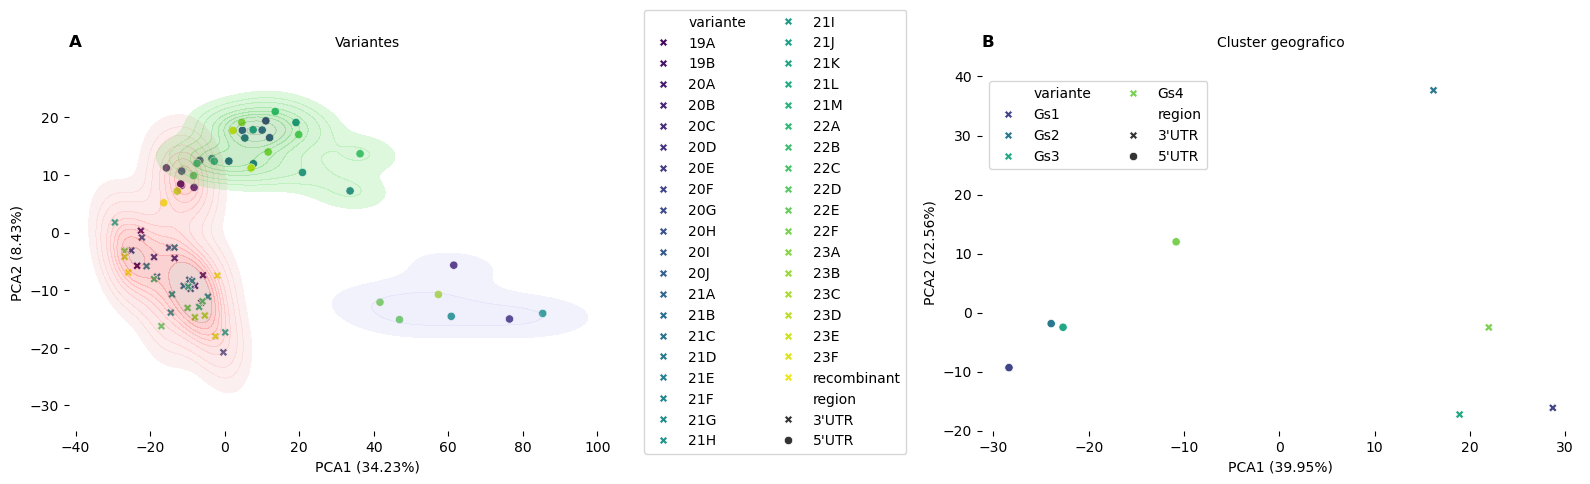

In [161]:
# Define markers
markers = {"5'UTR": 'o', "3'UTR": 'X'}

# Create a figure with two subplots in two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# First plot
sns.scatterplot(data=pca_df2, x='PC1', y='PC2', hue='variante', 
                markers=markers, style='region', palette='viridis', ax=axes[1])
axes[1].set_xlabel('PCA1 (39.95%)')
axes[1].set_ylabel('PCA2 (22.56%)')
axes[1].legend(ncol=2)
sns.despine(left=True, bottom=True, ax=axes[1])


# Second plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='variante', 
                markers=markers, style='region', palette='viridis', ax=axes[0])
sns.kdeplot(data=pca_df, x='PC1', y='PC2', fill=True, alpha=0.2, hue='cluster', 
            palette={0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}, ax=axes[0])
axes[0].set_xlabel('PCA1 (34.23%)')
axes[0].set_ylabel('PCA2 (8.43%)')
axes[0].legend(ncol=2, bbox_to_anchor=(0.95, 1.2), loc='upper left')
sns.despine(left=True, bottom=True, ax=axes[0])


# Set titles for the subplots
axes[0].set_title("A", fontweight="bold", loc='left')
axes[1].set_title("B", fontweight="bold", loc='left')

axes[0].set_title('Variantes', fontsize=10, pad=20)
axes[1].set_title('Cluster geografico', fontsize=10, pad=20)


plt.tight_layout()
plt.savefig('../../Plots/PCA_Variants.pdf', bbox_inches='tight')
plt.show()

# Inspeccion por variante

In [543]:
dfv_pathways_count = pd.DataFrame(dfv[['function', 'Variant', 'Region']].value_counts()).reset_index()
dfv_pathways_count

,function,Variant,Region,count
0,Regulación positiva de proliferación celular,21I,5'UTR,88
1,Regulación positiva de proliferación celular,20D,5'UTR,81
2,Regulación positiva de proliferación celular,21H,5'UTR,71
3,Regulación positiva de procesos metabolicos,21I,5'UTR,70
4,Regulación positiva de proliferación celular,23C,5'UTR,70
...,...,...,...,...
144074,negative regulation of intrinsic apoptotic sig...,recombinant,5'UTR,1
144075,negative regulation of intrinsic apoptotic sig...,23E,5'UTR,1
144076,negative regulation of intrinsic apoptotic sig...,22E,5'UTR,1
144077,negative regulation of intrinsic apoptotic sig...,22D,5'UTR,1


In [544]:
df_top10v = dfv_pathways_count.groupby(['Variant', 'Region']).head(15)

df_top10v_5 = df_top10v[df_top10v['Region']=="5'UTR"].drop(['Region'], axis = 1)
df_top10v_3 = df_top10v[df_top10v['Region']=="3'UTR"].drop(['Region'], axis = 1)

mat_v5 = df_top10v_5.pivot(index='function', columns=['Variant'], values='count')
mat_v3 = df_top10v_3.pivot(index='function', columns=['Variant'], values='count')
mat_v5

Variant,19A,19B,20A,20B,20C,20D,20E,20F,20G,20H,...,22D,22E,22F,23A,23B,23C,23D,23E,23F,recombinant
function,,,,,,,,,,,,,,,,,,,,,
Desarrollo de sistema,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Desarrollo de tubo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,20.0,NaN,NaN,NaN,NaN,13.0,NaN,10.0
Fosforilación,NaN,NaN,10.0,25.0,NaN,28.0,15.0,11.0,11.0,15.0,...,NaN,22.0,21.0,NaN,14.0,25.0,NaN,NaN,15.0,10.0
Fosforilación de proteinas,19.0,19.0,19.0,48.0,18.0,51.0,30.0,22.0,22.0,28.0,...,31.0,40.0,37.0,27.0,29.0,47.0,17.0,23.0,28.0,20.0
Metabolismo de nitrógeno,9.0,NaN,NaN,23.0,NaN,31.0,17.0,11.0,NaN,17.0,...,21.0,24.0,22.0,16.0,14.0,27.0,NaN,13.0,13.0,NaN
Morfogénesis,NaN,10.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
Morfogénesis de tubo,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Proceso biosintético de macromoléculas celulares,NaN,NaN,10.0,21.0,NaN,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,13.0,NaN
Proliferación de células epiteliales,15.0,15.0,14.0,54.0,16.0,54.0,32.0,18.0,26.0,36.0,...,31.0,34.0,37.0,26.0,26.0,34.0,15.0,20.0,21.0,21.0


In [545]:
mat_v5.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region5.tsv', sep = '\t')
mat_v3.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/MatrixPathwaysTop15_variants_region3.tsv', sep = '\t')

# Generate data to EULER PLOT

In [546]:
g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

eval = 0; contador = 0
for i in [g1, g2, g3, g4]:
    if len(i) > eval:
        print(f'{contador}', {len(i)})
        eval = len(i)
    contador +=1

g1 = g1 + ['NaN']*(eval - len(g1))
g2 = g2 + ['NaN']*(eval - len(g2))
g4 = g4 + ['NaN']*(eval - len(g4))

len(g2)

0 {11986}
2 {12134}


12134

In [547]:
df = pd.DataFrame({
                   'miRNA_Estrato_0': g1,
                   'miRNA_Estrato_1': g2, 
                   'miRNA_Estrato_2': g3, 
                   'miRNA_Estrato_3': g4
                  })
df

,miRNA_Estrato_0,miRNA_Estrato_1,miRNA_Estrato_2,miRNA_Estrato_3
0,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
1,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
2,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
3,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
4,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
...,...,...,...,...
12129,NaN,NaN,hsa-miR-29b-3p,NaN
12130,NaN,NaN,hsa-miR-29b-3p,NaN
12131,NaN,NaN,hsa-miR-29b-3p,NaN
12132,NaN,NaN,hsa-miR-29b-3p,NaN


In [548]:
ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

4, 1,7,3, 51


In [549]:
dfsp_ug1_count

,function,Variant,Region,count
0,Regulación negativa de transcripción,Gs1,3'UTR,2
1,Regulación negativa de transducción de señales...,Gs1,3'UTR,2
2,Respuesta a citocina,Gs1,3'UTR,2
3,Fosforilación de proteinas,Gs1,5'UTR,2
4,Regulación positiva de procesos metabolicos,Gs1,3'UTR,2
...,...,...,...,...
313,female pregnancy,Gs1,3'UTR,1
314,fat cell differentiation,Gs1,3'UTR,1
315,extrinsic apoptotic signaling pathway via deat...,Gs1,3'UTR,1
316,extrinsic apoptotic signaling pathway in absen...,Gs1,3'UTR,1


In [550]:
dfsp_ug1 = dfsp[dfsp['miRNA'].isin(list(ug1))]
dfsp_ug1_count = pd.DataFrame(dfsp_ug1[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug1 = dfsp_ug1_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug1

,function,Variant,Region,count
0,Regulación negativa de transcripción,Gs1,3'UTR,2
1,Regulación negativa de transducción de señales...,Gs1,3'UTR,2
2,Respuesta a citocina,Gs1,3'UTR,2
3,Fosforilación de proteinas,Gs1,5'UTR,2
5,Regulación positiva de actividad de la quinasa...,Gs1,5'UTR,2
6,Regulación positiva de la cascada MAPK,Gs1,5'UTR,2


In [551]:
dfsp_ug2 = dfsp[dfsp['miRNA'].isin(list(ug2))]
dfsp_ug2_count = pd.DataFrame(dfsp_ug2[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug2 = dfsp_ug2_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug2


dfsp_ug3 = dfsp[dfsp['miRNA'].isin(list(ug3))]
dfsp_ug3_count = pd.DataFrame(dfsp_ug3[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug3 = dfsp_ug3_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug3



dfsp_ug4 = dfsp[dfsp['miRNA'].isin(list(ug4))]
dfsp_ug4_count = pd.DataFrame(dfsp_ug4[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug4 = dfsp_ug4_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug4

dfsp_ugG = dfsp[dfsp['miRNA'].isin(list(ugG))]
dfsp_ugG_count = pd.DataFrame(dfsp_ugG[['function', 'Region']].value_counts()).reset_index()

df_topsp_ugG = dfsp_ugG_count.groupby(['Region']).head(5)
df_topsp_ugG

,function,Region,count
0,Regulación positiva de proliferación celular,5'UTR,177
1,Regulación positiva de procesos metabolicos,5'UTR,148
2,Regulación de diferenciación celular,5'UTR,115
3,Fosforilación de proteinas,5'UTR,105
4,Regulación de muerte celular,5'UTR,95
6,Regulación positiva de proliferación celular,3'UTR,78
10,Proliferación de células epiteliales,3'UTR,54
31,Regulación de diferenciación celular,3'UTR,46
43,Regulación positiva de procesos metabolicos,3'UTR,42
49,Fosforilación de proteinas,3'UTR,41


In [552]:
df_topsp_ug4

,function,Variant,Region,count
0,Metilación de DNA,Gs4,5'UTR,3
1,Proliferación de células epiteliales,Gs4,3'UTR,3
2,Regulación epigenética,Gs4,5'UTR,2
3,Regulación negativa de transcripción,Gs4,5'UTR,2
4,Respiración celular,Gs4,3'UTR,2
27,Proceso de oxidación-reducción,Gs4,3'UTR,1


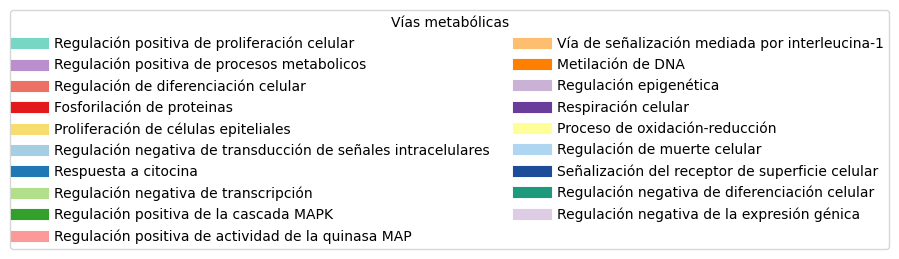

In [640]:
c = {
    'Regulación positiva de proliferación celular': '#76d7c4',
    'Regulación positiva de procesos metabolicos': '#bb8fce',
    'Regulación de diferenciación celular': '#ec7063',
    'Fosforilación de proteinas': '#d62728',
    'Proliferación de células epiteliales': '#f7dc6f',
    'Fosforilación de proteinas': '#1c9099',
    'Regulación negativa de transducción de señales intracelulares': '#a6cee3',
    'Respuesta a citocina':  '#1f78b4',
    'Regulación negativa de transcripción': '#b2df8a',
    'Regulación positiva de la cascada MAPK': '#33a02c',
    'Regulación positiva de actividad de la quinasa MAP': '#fb9a99',
    'Fosforilación de proteinas': '#e31a1c',
    'Vía de señalización mediada por interleucina-1':'#fdbf6f',
    'Metilación de DNA':'#ff7f00',
    'Regulación epigenética':'#cab2d6',
    'Respiración celular':'#6a3d9a',
    'Proceso de oxidación-reducción':'#ffff99',
    'Regulación de muerte celular':'#aed6f1',
    'Señalización del receptor de superficie celular':'#1d4c99',
    'Regulación negativa de diferenciación celular': '#1d997b',
    'Regulación negativa de la expresión génica':'#decbe4',
}

fig, ax = plt.subplots(figsize=(6, 2))

# Añadir una leyenda con los colores
for label, color in c.items():
    ax.plot([], [], label=label, color=color, linewidth=8)

# Crear la leyenda y añadir un título
legend = ax.legend(loc='center', ncol=2)
legend.set_title('Vías metabólicas')

ax.axis('off')

plt.tight_layout()
plt.savefig('../../Plots/leyendaVias.pdf',  bbox_inches='tight')

# Mostrar la figura
plt.show()

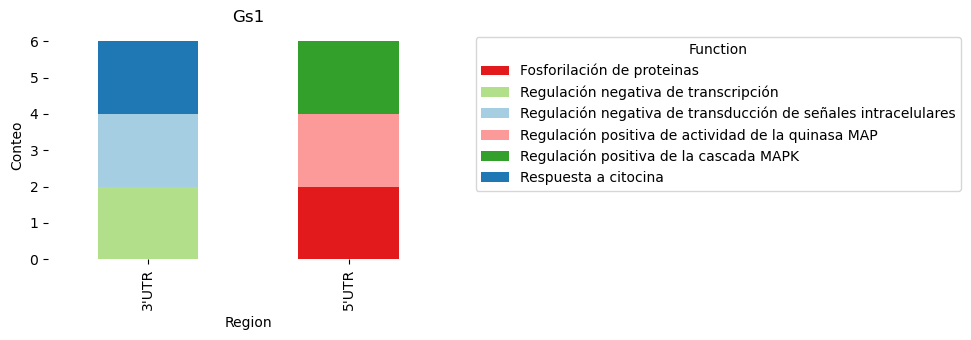

In [616]:
df_pivot = df_topsp_ug1.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs1')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS1.pdf')
plt.show()

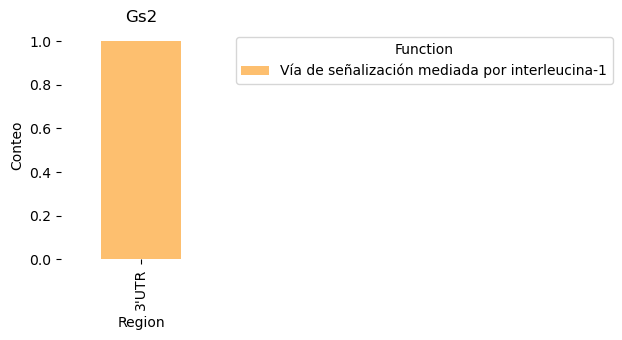

In [617]:
df_pivot = df_topsp_ug2.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(6.5, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs2')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS2.pdf')
plt.show()

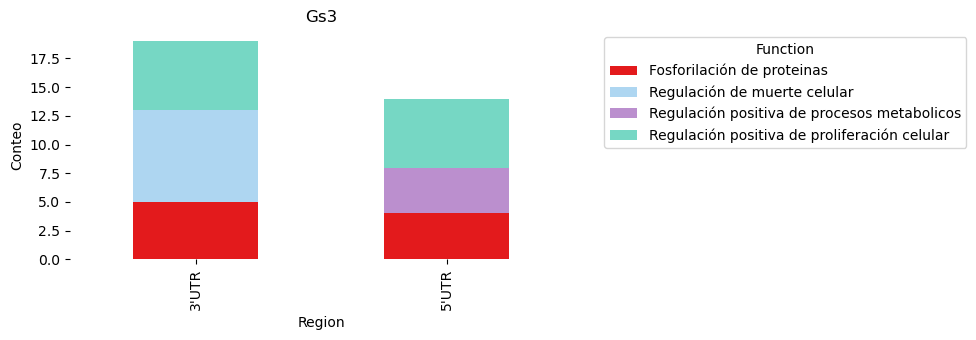

In [618]:
df_pivot = df_topsp_ug3.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs3')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS3.pdf')
plt.show()

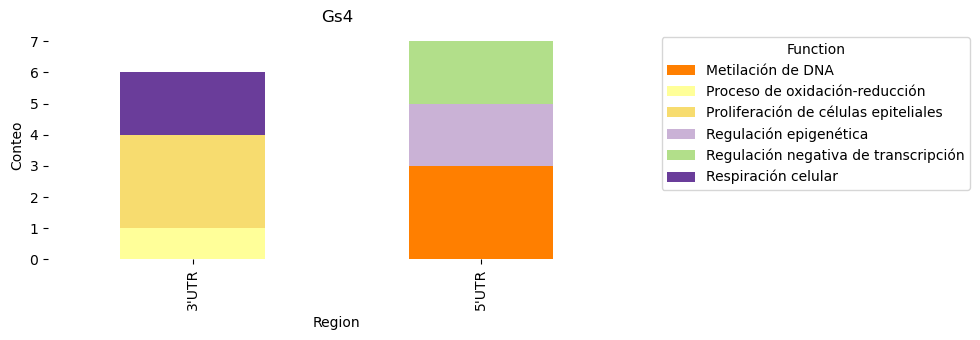

In [619]:
df_pivot = df_topsp_ug4.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs4')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS4.pdf')
plt.show()

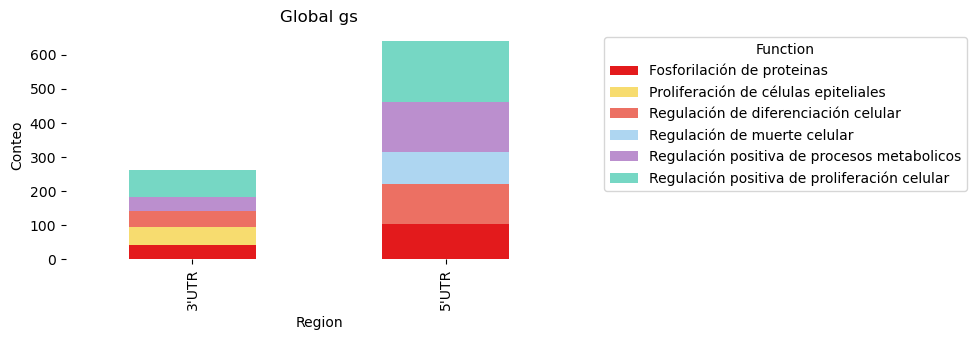

In [620]:
df_pivot = df_topsp_ugG.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Global gs')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGSG.pdf')
plt.show()

In [621]:
df.to_csv('../../Data/Estratos/miRNA_predichos_SpectrumEuler.tsv', sep = '\t', index = False)

In [622]:
g1 = list(dfgt[dfgt['Variant']=='Gst1']['miRNA'])
g2 = list(dfgt[dfgt['Variant']=='Gst2']['miRNA'])


eval = 0; contador = 0
for i in [g1, g2]:
    if len(i) > eval:
        print(f'{contador}', {len(i)})
        eval = len(i)
    contador +=1

g1 = g1 + ['NaN']*(eval - len(g1))

0 {8719}
1 {16131}


In [623]:
df = pd.DataFrame({
                   'miRNA_Estrato_0': g1,
                   'miRNA_Estrato_1': g2,
                  })
df

,miRNA_Estrato_0,miRNA_Estrato_1
0,hsa-miR-381-3p,hsa-miR-503-5p
1,hsa-miR-381-3p,hsa-miR-503-5p
2,hsa-miR-381-3p,hsa-miR-503-5p
3,hsa-miR-381-3p,hsa-miR-503-5p
4,hsa-miR-381-3p,hsa-miR-503-5p
...,...,...
16126,NaN,hsa-miR-497-5p
16127,NaN,hsa-miR-497-5p
16128,NaN,hsa-miR-1285-3p
16129,NaN,hsa-miR-1285-3p


In [624]:
ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

print(f'{len(ug1)}, {len(ug2)}, {len(ugG)}')

14, 23, 62


In [625]:
dfgt_ug1 = dfgt[dfgt['miRNA'].isin(list(ug1))]
dfgt_ug1_count = pd.DataFrame(dfgt_ug1[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topgt_ug1 = dfgt_ug1_count.groupby(['Variant', 'Region']).head(5)
df_topgt_ug1

,function,Variant,Region,count
0,Regulación de muerte celular,Gst1,3'UTR,8
1,Regulación positiva de proliferación celular,Gst1,5'UTR,7
2,Regulación negativa de transcripción,Gst1,3'UTR,6
3,Regulación positiva de proliferación celular,Gst1,3'UTR,5
4,Regulación negativa de transcripción,Gst1,5'UTR,4
5,Regulación negativa de diferenciación celular,Gst1,3'UTR,4
6,Regulación negativa de transducción de señales...,Gst1,3'UTR,4
7,Regulación de diferenciación celular,Gst1,5'UTR,4
9,Metilación de DNA,Gst1,5'UTR,3
10,Regulación negativa de la expresión génica,Gst1,5'UTR,3


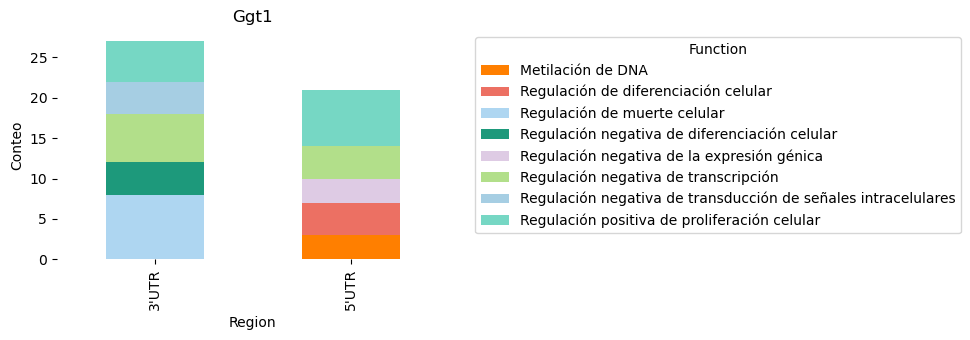

In [626]:
df_pivot = df_topgt_ug1.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Ggt1')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGT1.pdf')
plt.show()

In [627]:
dfgt_ug2 = dfgt[dfgt['miRNA'].isin(list(ug2))]
dfgt_ug2_count = pd.DataFrame(dfgt_ug2[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topgt_ug2 = dfgt_ug2_count.groupby(['Variant', 'Region']).head(5)
df_topgt_ug2

,function,Variant,Region,count
0,Regulación positiva de proliferación celular,Gst2,5'UTR,27
1,Regulación de muerte celular,Gst2,5'UTR,23
2,Regulación positiva de procesos metabolicos,Gst2,5'UTR,19
3,Proliferación de células epiteliales,Gst2,5'UTR,18
4,Regulación de muerte celular,Gst2,3'UTR,15
5,Regulación de diferenciación celular,Gst2,5'UTR,15
10,Regulación positiva de proliferación celular,Gst2,3'UTR,12
94,Regulación positiva de procesos metabolicos,Gst2,3'UTR,6
127,Regulación de diferenciación celular,Gst2,3'UTR,6
164,Señalización del receptor de superficie celular,Gst2,3'UTR,5


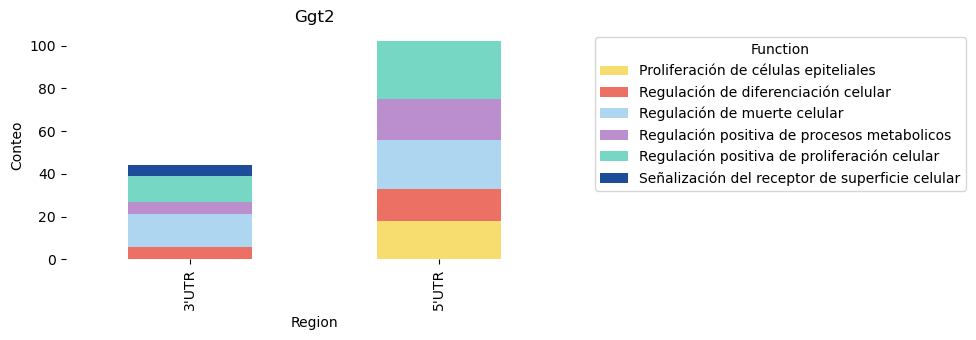

In [628]:
df_pivot = df_topgt_ug2.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Ggt2')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGT2.pdf')
plt.show()

In [629]:
dfgt_ugG = dfgt[dfgt['miRNA'].isin(list(ugG))]
dfgt_ugG_count = pd.DataFrame(dfgt_ugG[['function', 'Region']].value_counts()).reset_index()

df_topgt_ugG = dfgt_ugG_count.groupby(['Region']).head(5)
df_topgt_ugG

,function,Region,count
0,Regulación positiva de proliferación celular,5'UTR,108
1,Regulación positiva de procesos metabolicos,5'UTR,93
2,Regulación de diferenciación celular,5'UTR,69
3,Regulación de muerte celular,5'UTR,65
4,Fosforilación de proteinas,5'UTR,61
6,Regulación positiva de proliferación celular,3'UTR,43
14,Proliferación de células epiteliales,3'UTR,33
27,Regulación de diferenciación celular,3'UTR,29
38,Regulación positiva de procesos metabolicos,3'UTR,28
59,Regulación de muerte celular,3'UTR,24


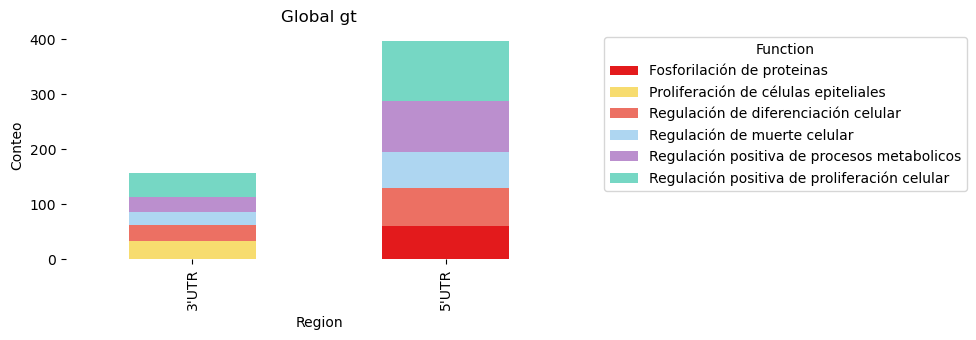

In [630]:
df_pivot = df_topgt_ugG.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=c, edgecolor='none')

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Global gt')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGTG.pdf')
plt.show()

In [631]:
df.to_csv('../../Data/Estratos/miRNA_predichos_ConstantClustersEuler.tsv', sep = '\t', index = False)